In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
import seaborn as sns 
import plotly.express as ex
import missingno as mno
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
import datetime

In [2]:
%time data = pd.read_csv('data-1.csv')
data.head()

CPU times: total: 969 ms

Wall time: 997 ms


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 18207 entries, 0 to 18206

Data columns (total 89 columns):

 #   Column                    Non-Null Count  Dtype  

---  ------                    --------------  -----  

 0   Unnamed: 0                18207 non-null  int64  

 1   ID                        18207 non-null  int64  

 2   Name                      18207 non-null  object 

 3   Age                       18207 non-null  int64  

 4   Photo                     18207 non-null  object 

 5   Nationality               18207 non-null  object 

 6   Flag                      18207 non-null  object 

 7   Overall                   18207 non-null  int64  

 8   Potential                 18207 non-null  int64  

 9   Club                      17966 non-null  object 

 10  Club Logo                 18207 non-null  object 

 11  Value                     18207 non-null  object 

 12  Wage                      18207 non-null  object 

 13  Special                   18207 non-null  i

In [4]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [5]:
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


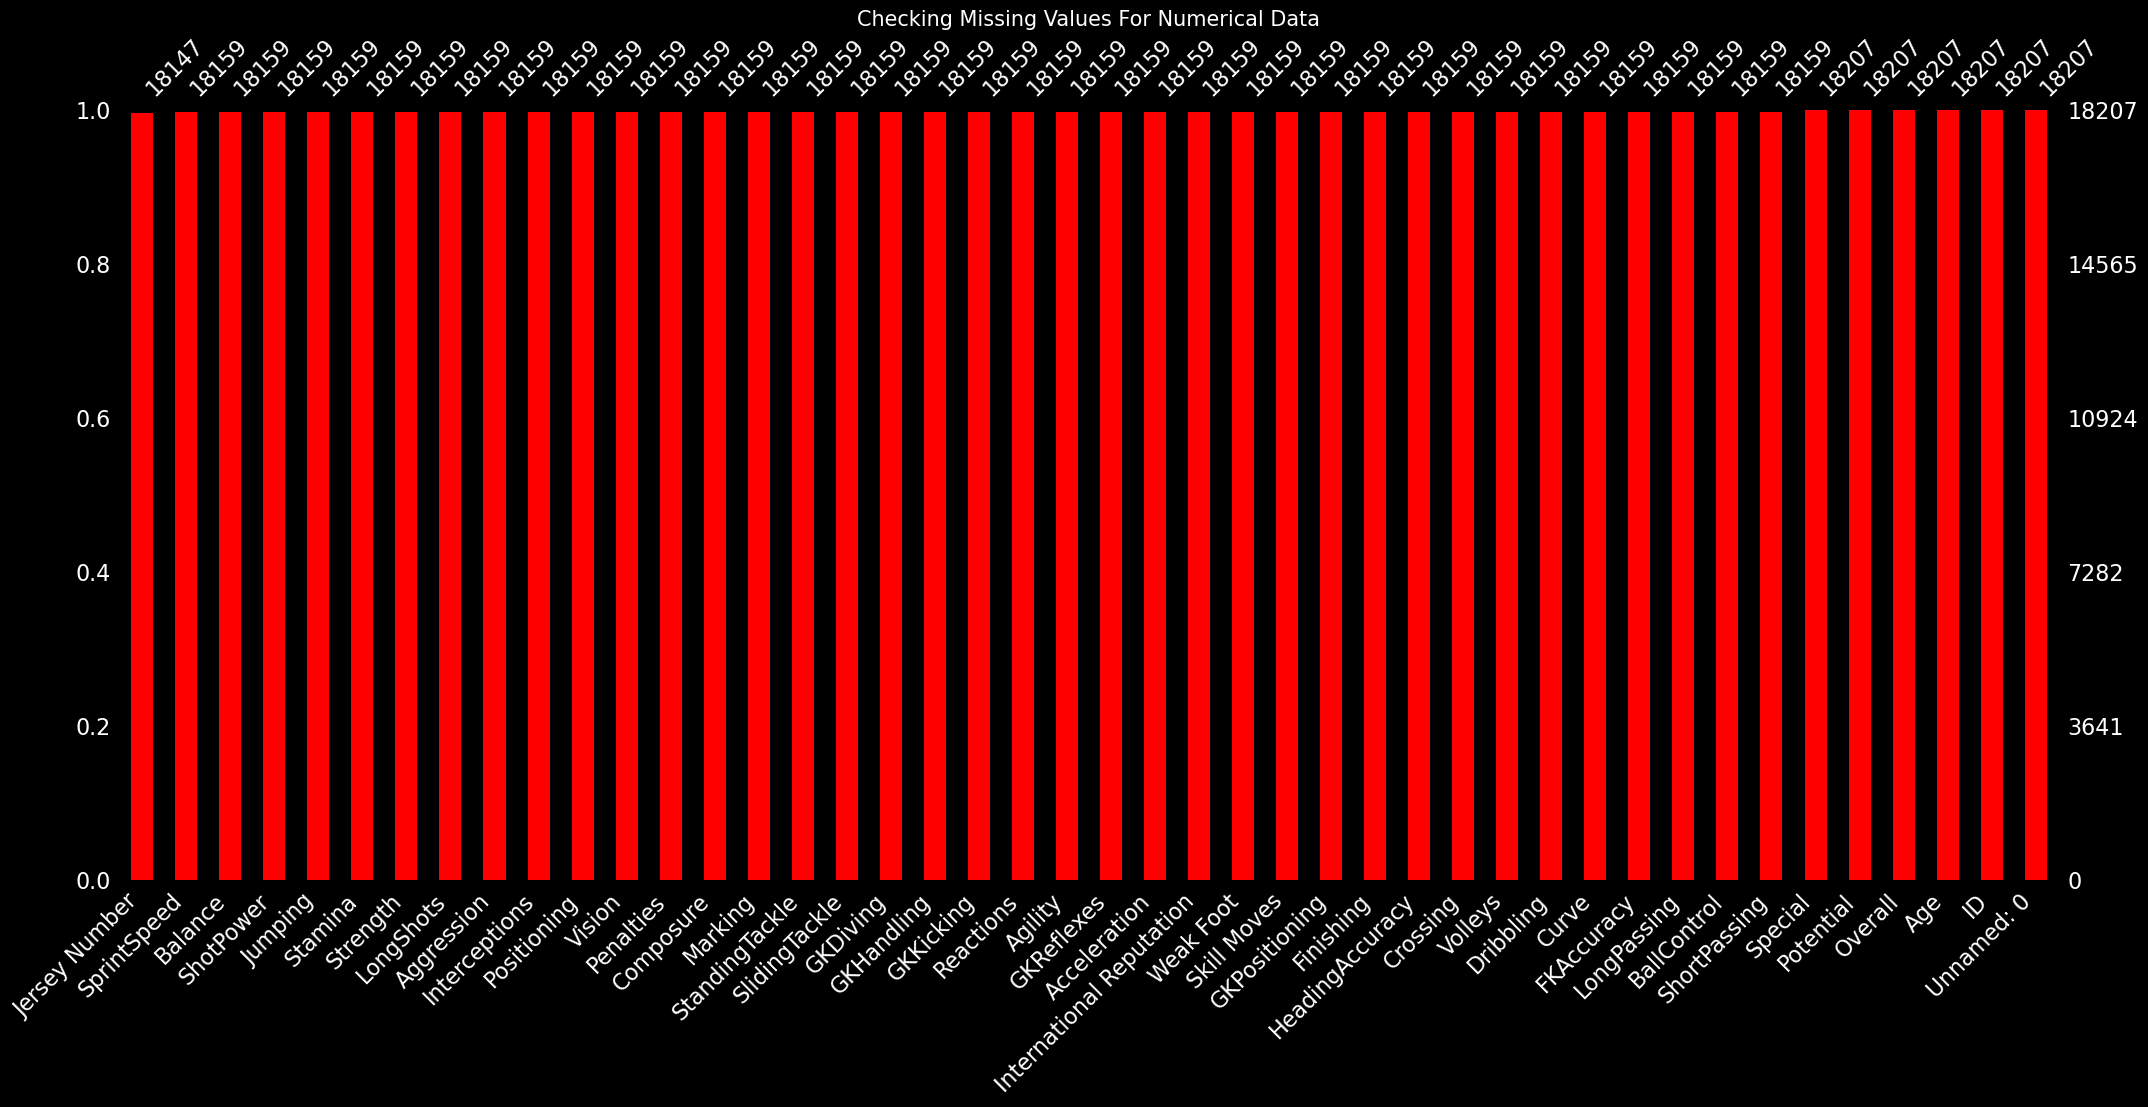

In [6]:
numerical_data = data.select_dtypes(include='number')
mno.bar(numerical_data,color = "red" ,sort = "ascending")
plt.title('Checking Missing Values For Numerical Data', fontsize = 15)
plt.show()

In [7]:
data.drop(columns=['Unnamed: 0', 'Loaned From'], inplace=True)
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandli

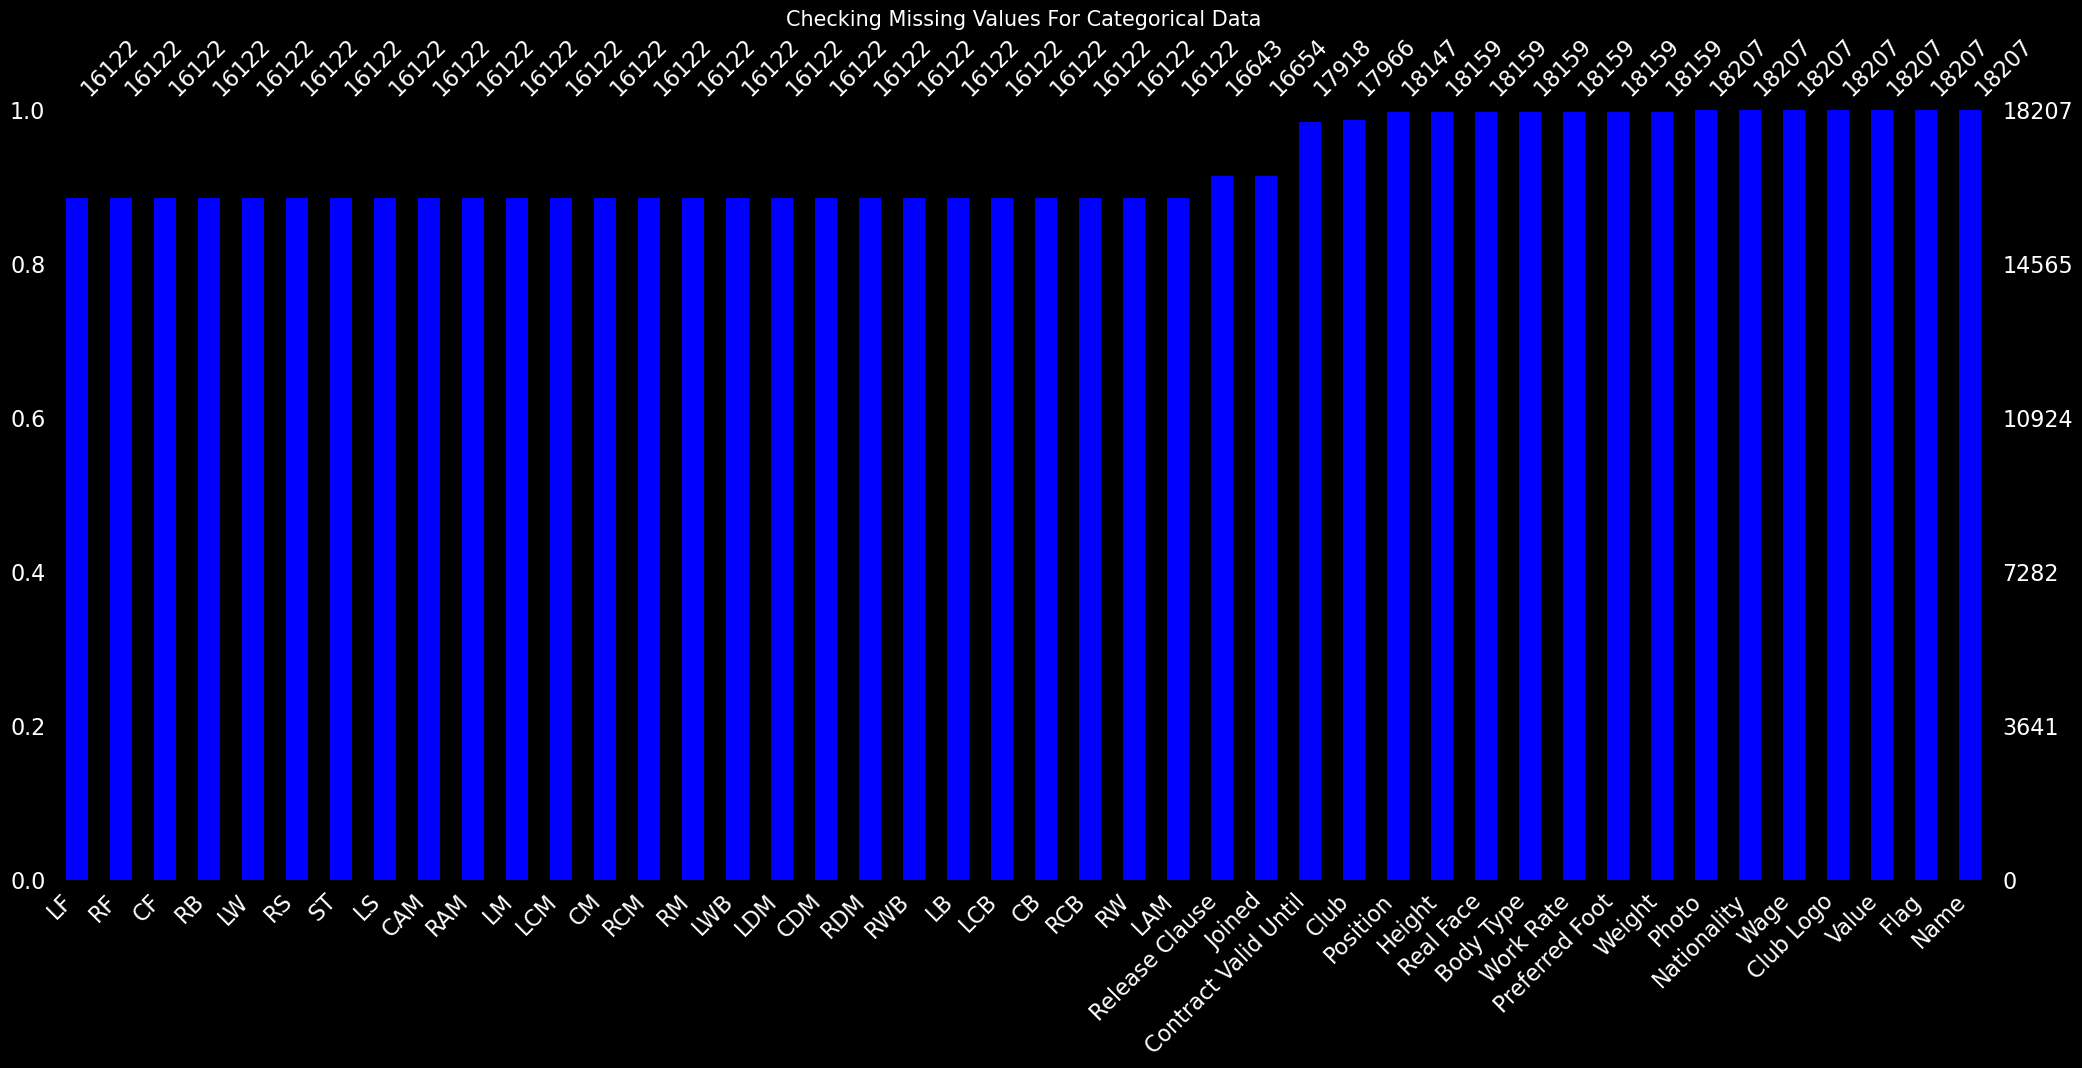

In [8]:
categorical_data = data.select_dtypes(include='object')
mno.bar(categorical_data,color = "blue" ,sort = "ascending")
plt.title('Checking Missing Values For Categorical Data', fontsize = 15)
plt.show()

In [9]:
mean_cols = ['ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 
             'HeadingAccuracy', 'Finishing', 'Crossing']
mode_cols = ['Weight', 'Contract Valid Until', 'Height', 'Joined', 'Jersey Number', 'Body Type']
specific_fill_cols = {'Position': 'ST', 'Club': 'No Club', 'Work Rate': 'Medium/ Medium', 
                      'Weak Foot': 3, 'Preferred Foot': 'Right', 'International Reputation': 1, 'Wage': '€200K'}
median_cols = ['Skill Moves']

for col in mean_cols:
    if col in data.columns:
        data[col].fillna(data[col].mean(), inplace=True)

for col in mode_cols:
    if col in data.columns:
        data[col].fillna(data[col].mode()[0], inplace=True)

for col, value in specific_fill_cols.items():
    if col in data.columns:
        data[col].fillna(value, inplace=True)

for col in median_cols:
    if col in data.columns:
        data[col].fillna(data[col].median(), inplace=True)


C:\Users\Zaghloula\AppData\Local\Temp\ipykernel_14700\3194707949.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





  data[col].fillna(data[col].mean(), inplace=True)

C:\Users\Zaghloula\AppData\Local\Temp\ipykernel_14700\3194707949.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.

The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [10]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandli

In [11]:
pd.set_option('display.max_rows', 100)
data.isnull().sum()

ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                           0
Club Logo                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Real Face                     48
Position                       0
Jersey Number                  0
Joined                         0
Contract Valid Until           0
Height                         0
Weight                         0
LS                          2085
ST                          2085
RS                          2085
LW                          2085
LF        

In [12]:
data.fillna(0, inplace = True)
data.isnull().sum()

ID                          0
Name                        0
Age                         0
Photo                       0
Nationality                 0
Flag                        0
Overall                     0
Potential                   0
Club                        0
Club Logo                   0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Real Face                   0
Position                    0
Jersey Number               0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
LS                          0
ST                          0
RS                          0
LW                          0
LF                          0
CF                          0
RF                          0
RW        

In [13]:
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [14]:
data['Defending'] = data.apply(defending, axis = 1)
data['General'] = data.apply(general, axis = 1)
data['Mental'] = data.apply(mental, axis = 1)
data['Passing'] = data.apply(passing, axis = 1)
data['Mobility'] = data.apply(mobility, axis = 1)
data['Power'] = data.apply(power, axis = 1)
data['Rating'] = data.apply(rating, axis = 1)
data['Shooting'] = data.apply(shooting, axis = 1)
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandli

C:\Users\Zaghloula\AppData\Local\Temp\ipykernel_14700\4166763784.py:7: UserWarning: 



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



Please adapt your code to use either `displot` (a figure-level function with

similar flexibility) or `histplot` (an axes-level function for histograms).



For a guide to updating your code to use the new functions, please see

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



  sns.distplot(data[col],kde=True,ax=ax ,color=color)

c:\Users\Zaghloula\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):

C:\Users\Zaghloula\AppData\Local\Temp\ipykernel_14700\4166763784.py:7: UserWarning: 



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



Please adapt your code to use either `disp

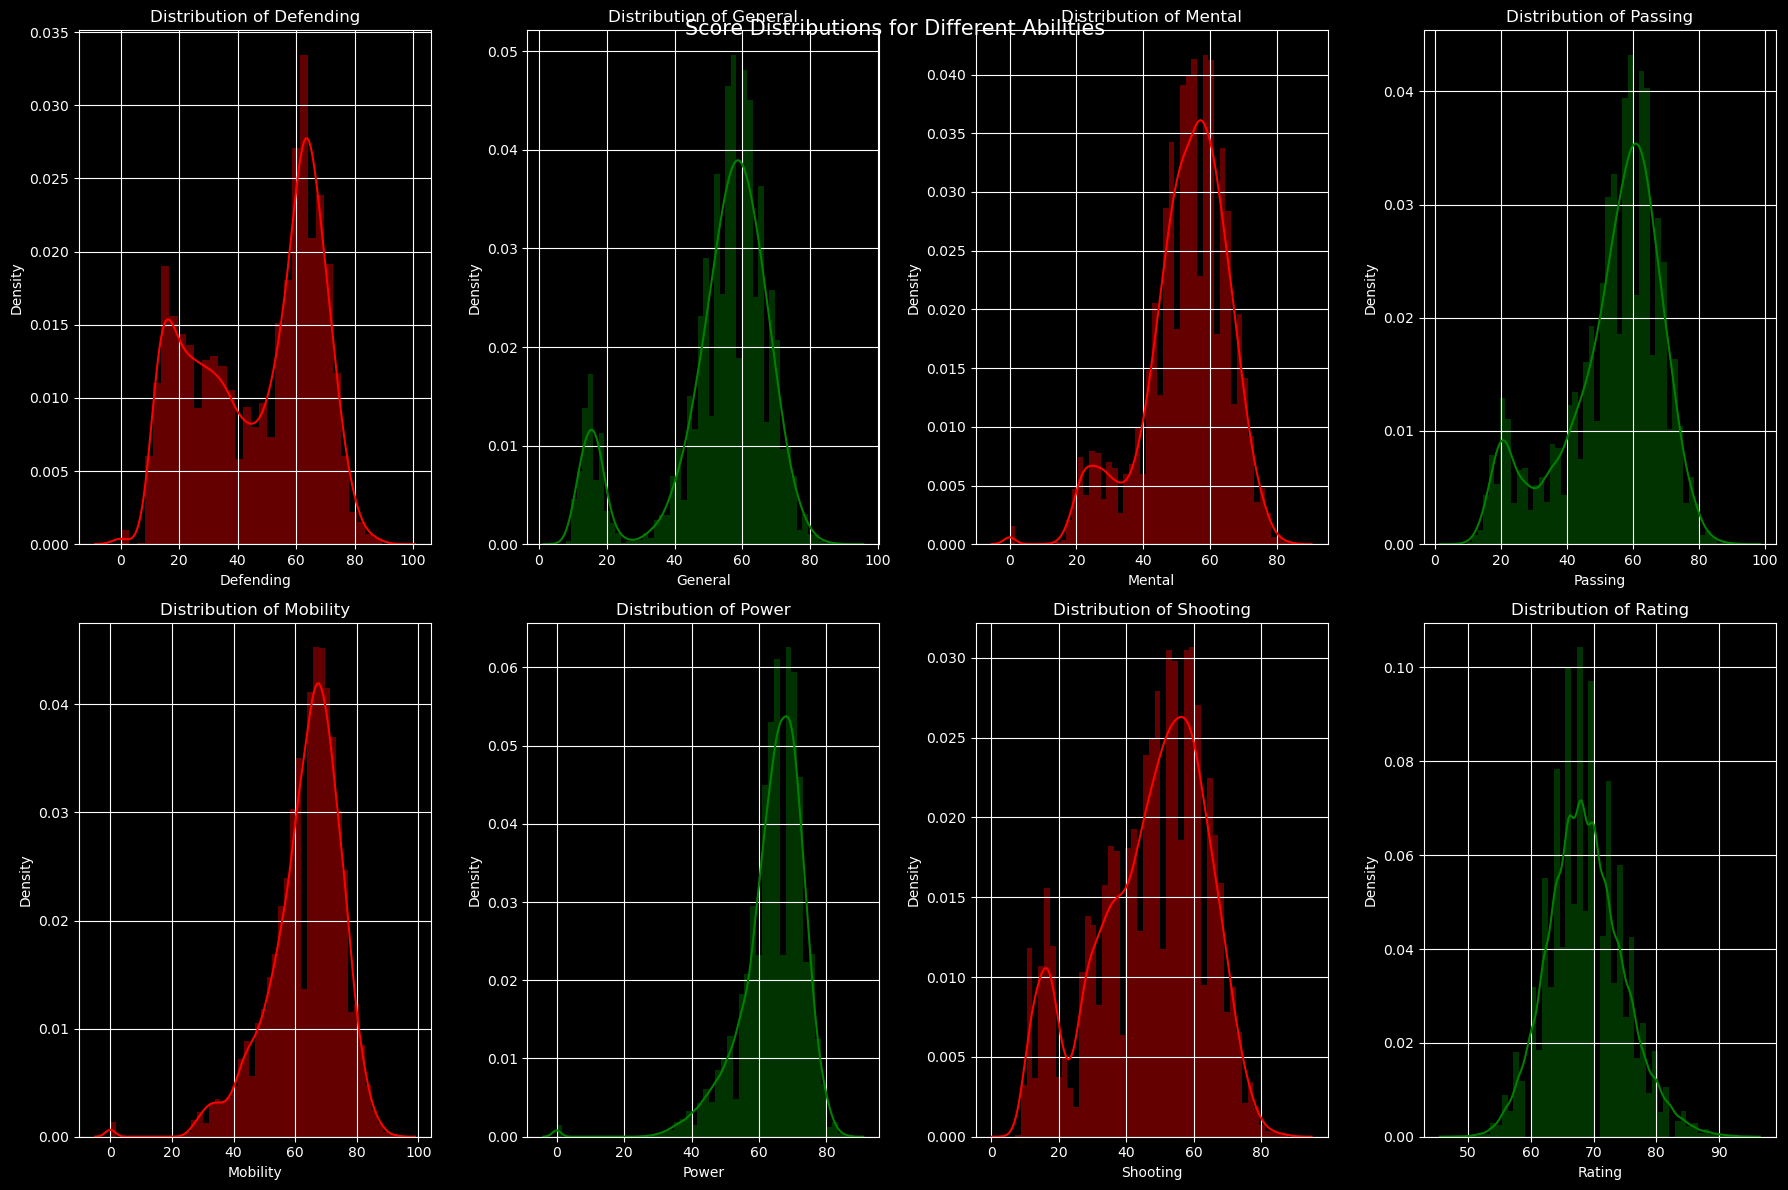

In [15]:
cols = ['Defending', 'General', 'Mental', 'Passing', 'Mobility', 'Power', 'Shooting', 'Rating']
plt.rcParams['figure.figsize'] = (18,12)
fig , axes = plt.subplots(2,4)
axes = axes.flatten()
colors = ['red', 'green', 'red', 'green', 'red', 'green', 'red', 'green']
for ax , col , color in zip (axes ,cols ,colors):
    sns.distplot(data[col],kde=True,ax=ax ,color=color)
    ax.grid()
    ax.set_title(f'Distribution of {col}', fontsize=12)

plt.tight_layout()
plt.suptitle('Score Distributions for Different Abilities', fontsize=15)
plt.show()



C:\Users\Zaghloula\AppData\Local\Temp\ipykernel_14700\2957244631.py:2: UserWarning: 



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



Please adapt your code to use either `displot` (a figure-level function with

similar flexibility) or `histplot` (an axes-level function for histograms).



For a guide to updating your code to use the new functions, please see

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



  sns.distplot(data['Age'], bins=20, color='red', kde=True)

c:\Users\Zaghloula\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


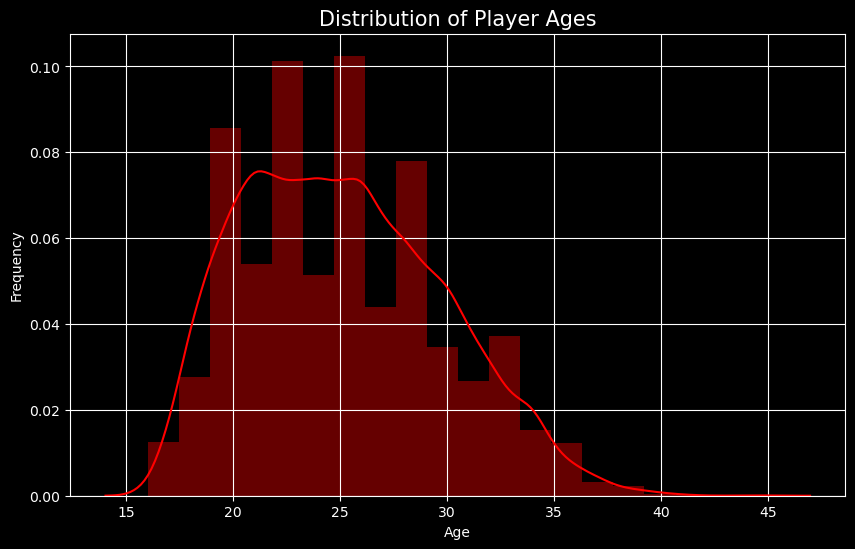

In [49]:
plt.figure(figsize=(10, 6))
sns.distplot(data['Age'], bins=20, color='red', kde=True)
plt.title('Distribution of Player Ages', fontsize=15)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

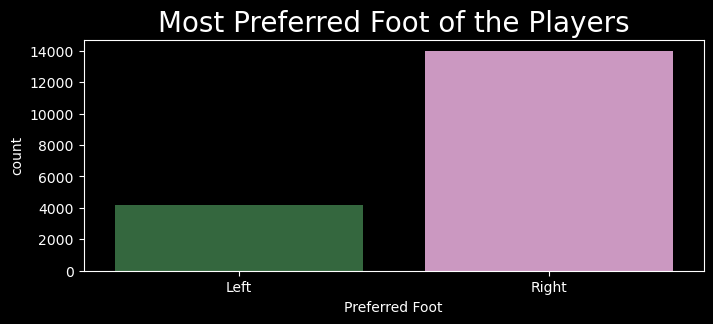

In [16]:
plt.rcParams["figure.figsize"] = (8,3)
sns.countplot(x='Preferred Foot', data=data,palette="cubehelix")
plt.title('Most Preferred Foot of the Players', fontsize = 20)
plt.show()

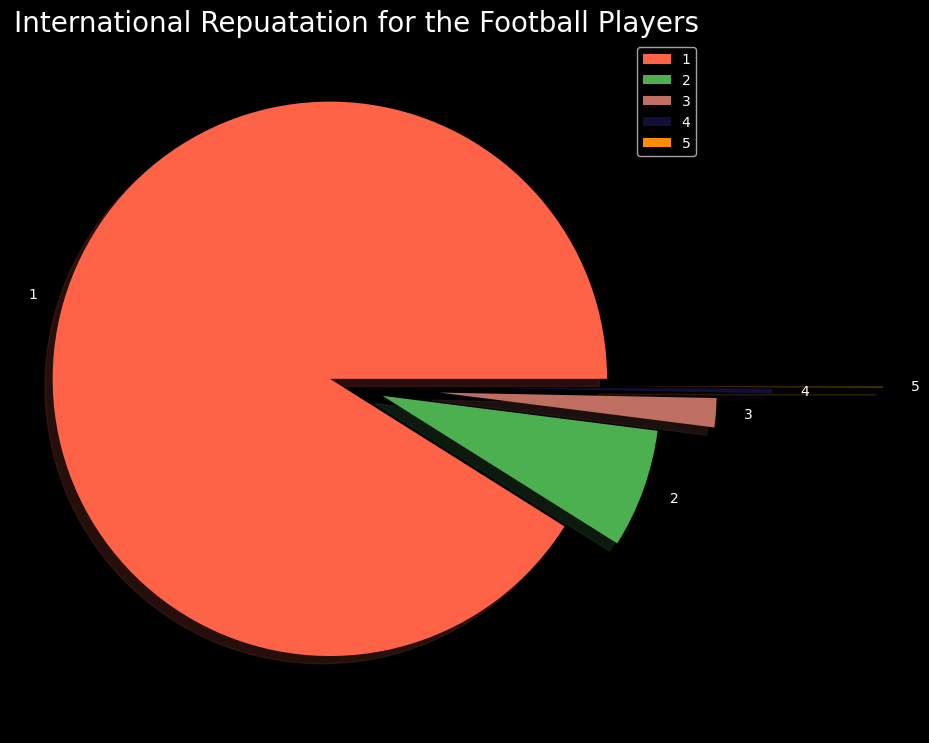

In [17]:
labels = [1,2,3,4,5]
sizes = data['International Reputation'].value_counts()
colors = ['#FF6347', '#4CAF50', '#BF6F61', '#100F3A', '#FF8C00'] 
explode = [0.1, 0.1, 0.3, 0.5, 0.9]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('International Repuatation for the Football Players', fontsize = 20)
plt.legend()
plt.show()


In [18]:
data[data['International Reputation'] == 5][['Name','Nationality',"Club",
                            'Overall']].sort_values(by = 'Overall',
                                        ascending = False).style.background_gradient(cmap = 'magma')

,Name,Nationality,Club,Overall
0,L. Messi,Argentina,FC Barcelona,94
1,Cristiano Ronaldo,Portugal,Juventus,94
2,Neymar Jr,Brazil,Paris Saint-Germain,92
7,L. Suárez,Uruguay,FC Barcelona,91
22,M. Neuer,Germany,FC Bayern München,89
109,Z. Ibrahimović,Sweden,LA Galaxy,85


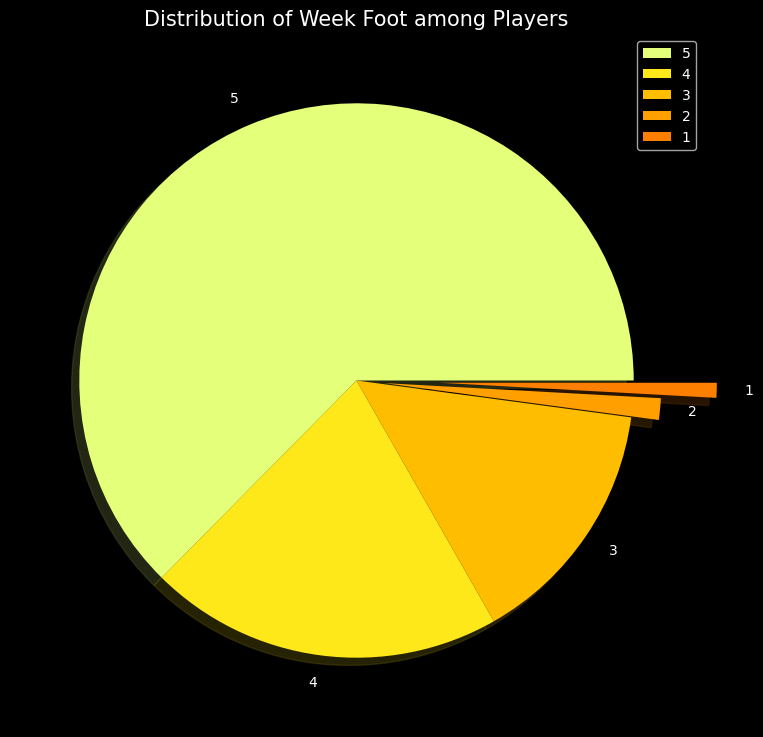

In [19]:
labels = ['5', '4', '3', '2', '1'] 
size = data['Weak Foot'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))
explode = [0, 0, 0, 0.1, 0.3]
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title('Distribution of Week Foot among Players', fontsize = 15)
plt.legend()
plt.show()

In [20]:
weak_foot = data[data['Weak Foot'] == 1][['Name','Nationality',"Club",
                            'Overall']].sort_values(by = 'Overall',
                                        ascending = False)
weak_foot.head()

,Name,Nationality,Club,Overall
37,H. Lloris,France,Tottenham Hotspur,88
210,R. Fährmann,Germany,FC Schalke 04,83
197,O. Baumann,Germany,TSG 1899 Hoffenheim,83
811,B. Traoré,Burkina Faso,Olympique Lyonnais,78
1343,I. Sarr,Senegal,Stade Rennais FC,76


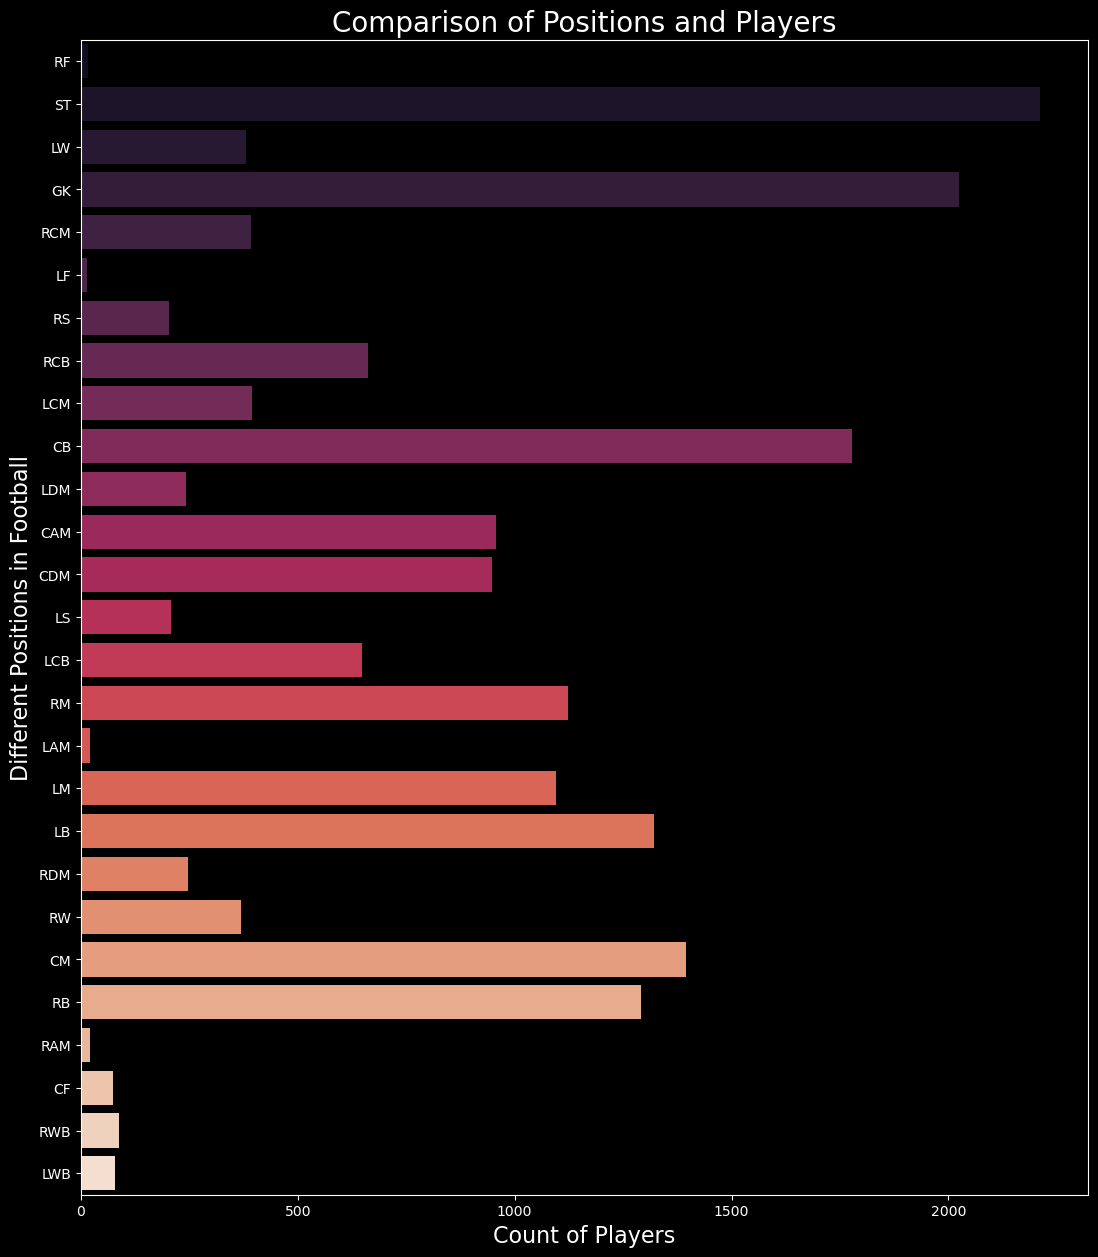

In [21]:
plt.figure(figsize = (13, 15))
ax = sns.countplot(y = 'Position', data = data, palette = 'rocket')
ax.set_ylabel(ylabel = 'Different Positions in Football', fontsize = 16)
ax.set_xlabel(xlabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

C:\Users\Zaghloula\AppData\Local\Temp\ipykernel_14700\52088150.py:5: UserWarning: 



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



Please adapt your code to use either `displot` (a figure-level function with

similar flexibility) or `histplot` (an axes-level function for histograms).



For a guide to updating your code to use the new functions, please see

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



  sns.distplot(data['Weight'], color = 'red')

c:\Users\Zaghloula\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):


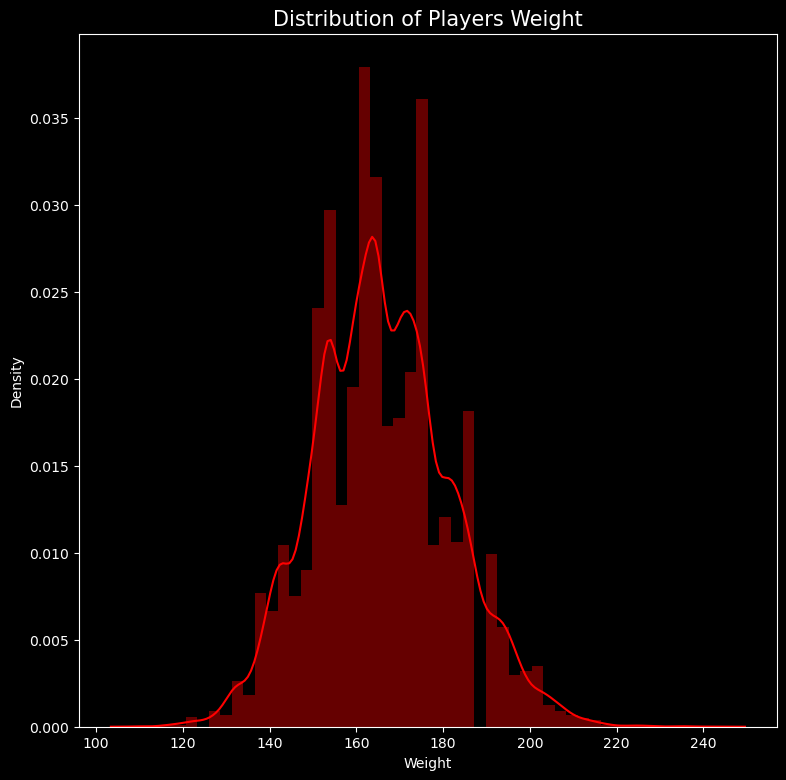

In [22]:
def extract_weight(value):
    weight = value.replace("lbs" , '')
    return float(weight)
data["Weight"] = data["Weight"].apply(lambda x : extract_weight(x))
sns.distplot(data['Weight'], color = 'red')
plt.title("Distribution of Players Weight", fontsize = 15)
plt.show()

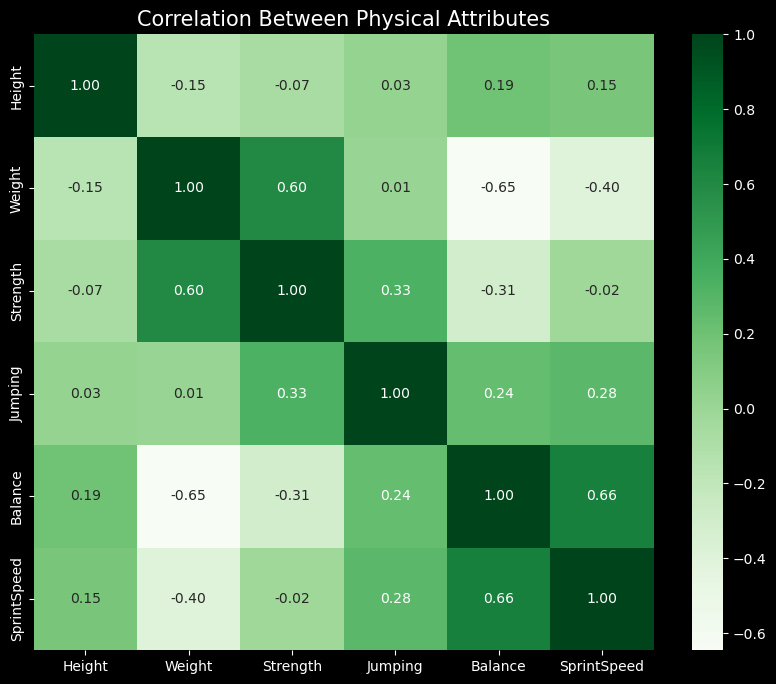

In [71]:
physical = data[['Height', 'Weight', 'Strength',"Jumping","Balance","SprintSpeed"]].dropna()
physical['Height'] = physical['Height'].replace('[\']', '', regex=True).astype(float)


plt.figure(figsize=(10, 8))
sns.heatmap(physical.corr(), annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation Between Physical Attributes', fontsize=15)
plt.show()


In [23]:
def extract_value_from(column):
    out = column.replace('€', '')
    if 'M' in out:
        out = float(out.replace('M', ''))*1000000
    elif 'K' in column:
        out = float(out.replace('K', ''))*1000
    return float(out)

C:\Users\Zaghloula\AppData\Local\Temp\ipykernel_14700\1972458646.py:5: UserWarning: 



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



Please adapt your code to use either `displot` (a figure-level function with

similar flexibility) or `histplot` (an axes-level function for histograms).



For a guide to updating your code to use the new functions, please see

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



  sns.distplot(data['Value'], color = 'green')

c:\Users\Zaghloula\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):

C:\Users\Zaghloula\AppData\Local\Temp\ipykernel_14700\1972458646.py:9: UserWarning: 



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



Please adapt your code to use either `displot` (a

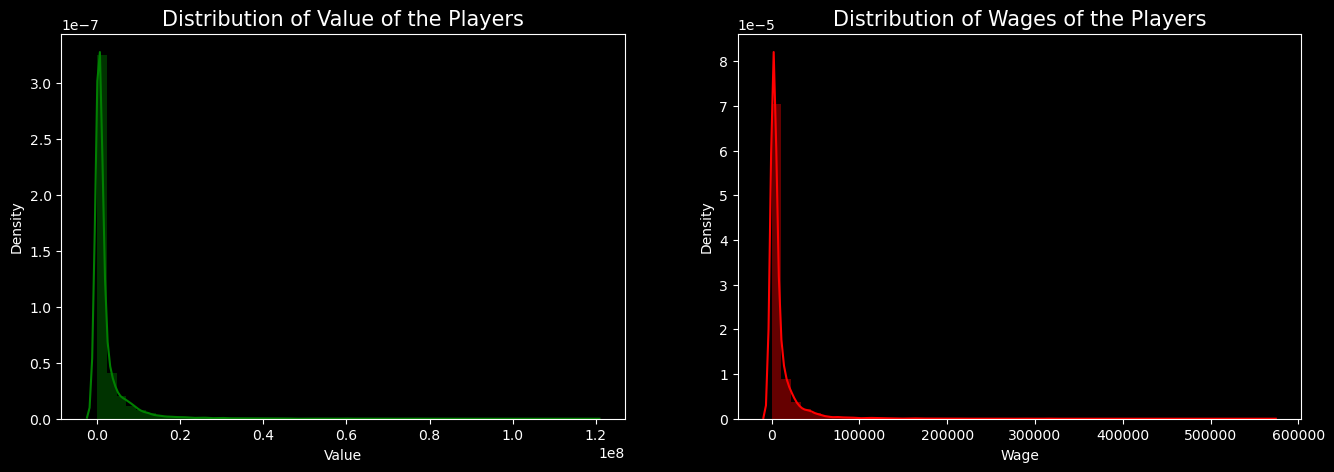

In [24]:
data['Value'] = data['Value'].apply(lambda x: extract_value_from(x))
data['Wage'] = data['Wage'].apply(lambda x: extract_value_from(x))
plt.rcParams['figure.figsize'] = (16, 5)
plt.subplot(1, 2, 1)
sns.distplot(data['Value'], color = 'green')
plt.title('Distribution of Value of the Players', fontsize = 15)

plt.subplot(1, 2, 2)
sns.distplot(data['Wage'], color = 'red')
plt.title('Distribution of Wages of the Players', fontsize = 15)
plt.show()

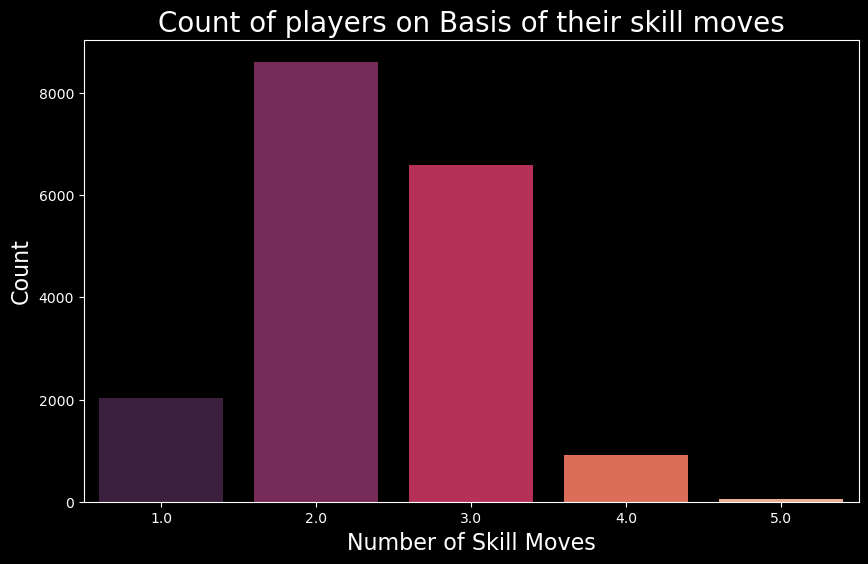

In [26]:
plt.rcParams['figure.figsize'] = (10, 6)
ax = sns.countplot(x = 'Skill Moves', data = data, palette = 'rocket')
ax.set_title(label = 'Count of players on Basis of their skill moves', fontsize = 20)
ax.set_xlabel(xlabel = 'Number of Skill Moves', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()


In [27]:
data[(data['Skill Moves'] == 5.0) & (data['Age'] < 20)][['Name','Age']].sort_values(by = 'Age',
                                        ascending = False).style.background_gradient(cmap = 'magma')

,Name,Age
25,K. Mbappé,19
2495,M. Ødegaard,19
1004,J. Sancho,18
1143,Vinícius Júnior,17


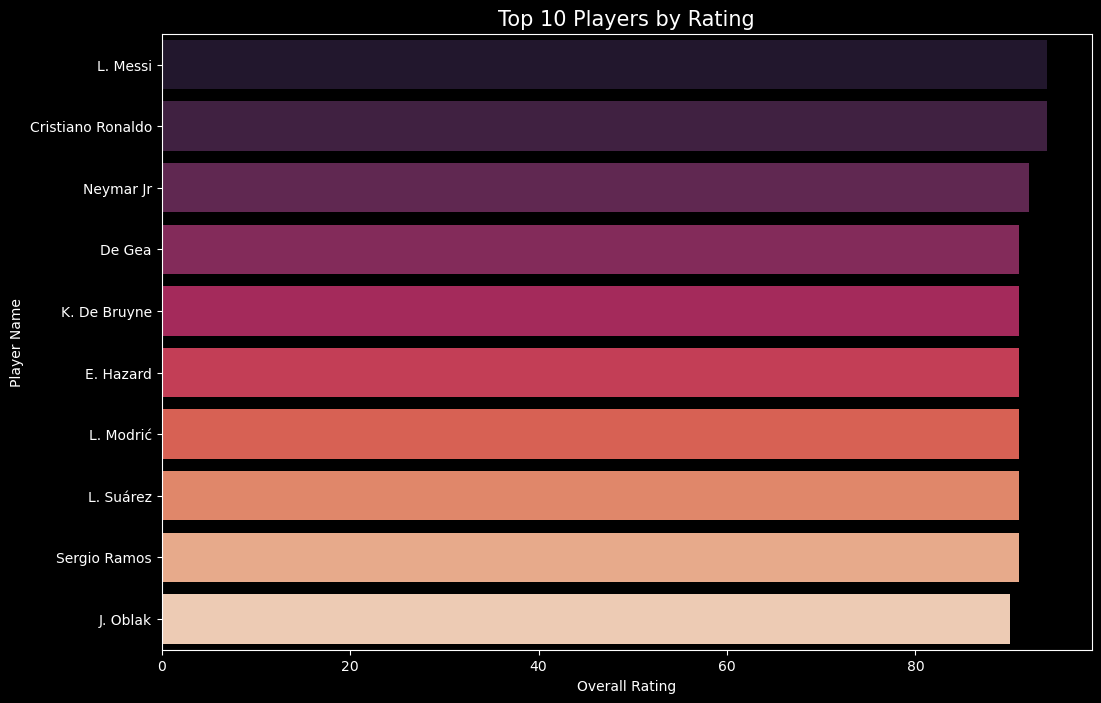

In [73]:
top_10_players = data.nlargest(10, 'Overall')[['Name', 'Overall']]
plt.figure(figsize=(12, 8))
sns.barplot(x='Overall', y='Name', data=top_10_players, palette='rocket')
plt.title('Top 10 Players by Rating', fontsize=15)
plt.xlabel('Overall Rating')
plt.ylabel('Player Name')
plt.show()


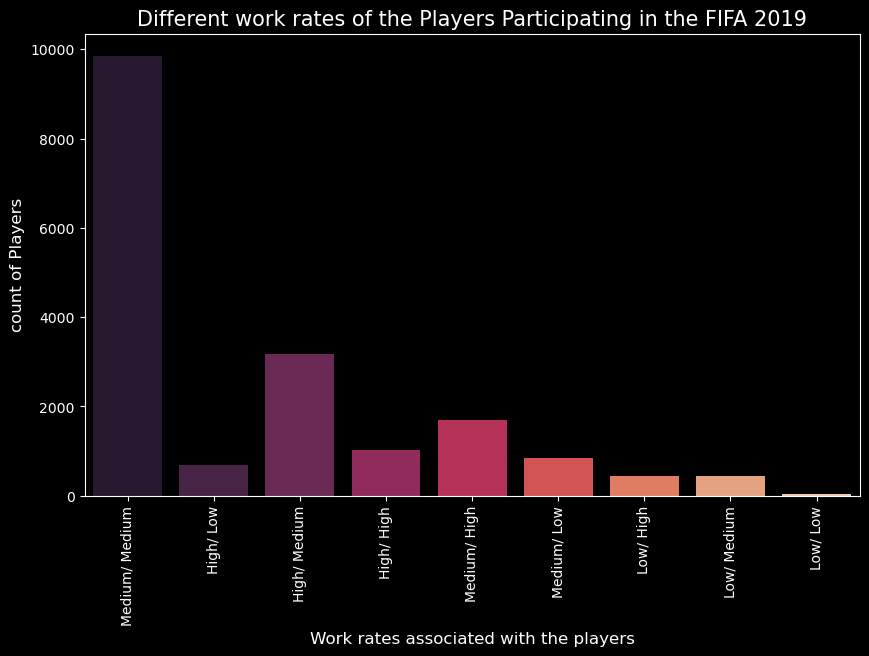

In [31]:
plt.rcParams['figure.figsize'] = (10, 6)
sns.countplot(x = 'Work Rate', data = data, palette = 'rocket')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 15)
plt.xlabel('Work rates associated with the players', fontsize = 12)
plt.ylabel('count of Players', fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

C:\Users\Zaghloula\AppData\Local\Temp\ipykernel_14700\2712140397.py:4: UserWarning: 



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



Please adapt your code to use either `displot` (a figure-level function with

similar flexibility) or `histplot` (an axes-level function for histograms).



For a guide to updating your code to use the new functions, please see

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



  ax = sns.distplot(x, bins = 58, kde = False, color = 'y')

C:\Users\Zaghloula\AppData\Local\Temp\ipykernel_14700\2712140397.py:11: UserWarning: 



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.



Please adapt your code to use either `displot` (a figure-level function with

similar flexibility) or `histplot` (an axes-level function for histograms).



For a guide to updating your code to use the new functions, please see

https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



  ax = sns

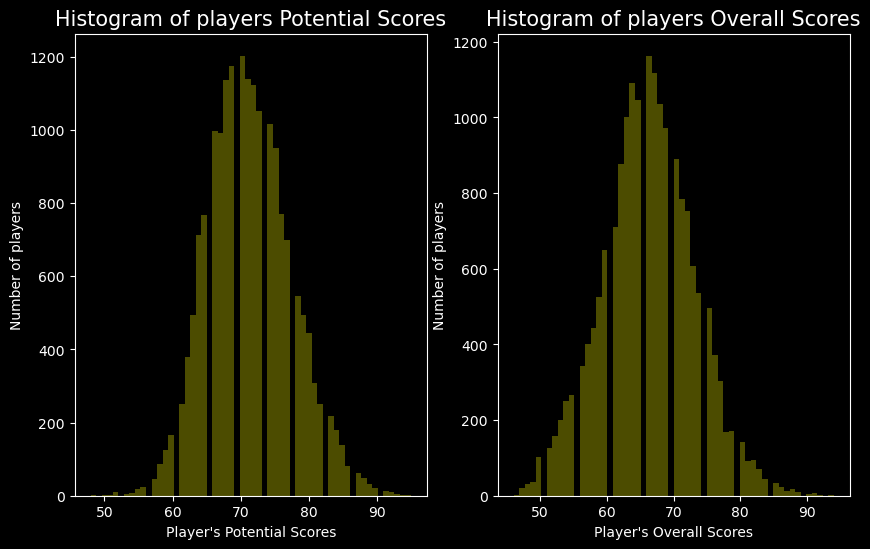

In [32]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.subplot(1, 2, 1)
x = data["Potential"]
ax = sns.distplot(x, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Potential Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Potential Scores', fontsize = 15)

plt.subplot(1, 2, 2)
y = data["Overall"]
ax = sns.distplot(y, bins = 58, kde = False, color = 'y')
ax.set_xlabel(xlabel = "Player's Overall Scores", fontsize = 10)
ax.set_ylabel(ylabel = 'Number of players', fontsize = 10)
ax.set_title(label = 'Histogram of players Overall Scores', fontsize = 15)
plt.show()


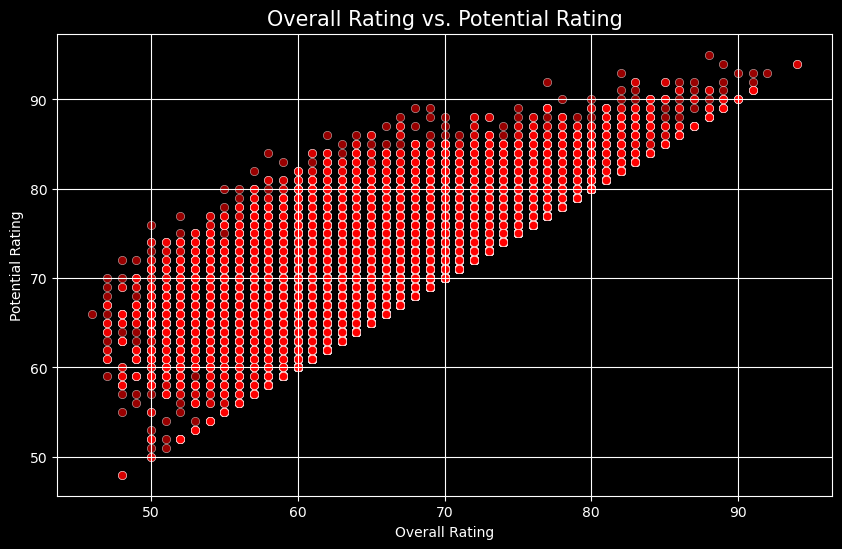

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Overall', y='Potential', data=data,color="red",alpha=0.6)
plt.title('Overall Rating vs. Potential Rating', fontsize=15)
plt.xlabel('Overall Rating')
plt.ylabel('Potential Rating')
plt.grid(True)
plt.show()

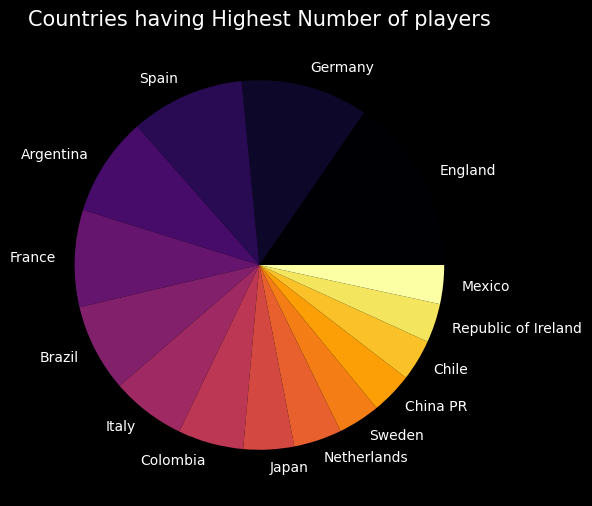

In [38]:
# picking up the countries with highest number of players to compare their overall scores

data['Nationality'].value_counts().head(15).plot(kind = 'pie', cmap = 'inferno',
                                        )
plt.title('Countries having Highest Number of players', fontsize = 15)
plt.axis('off')
plt.show()

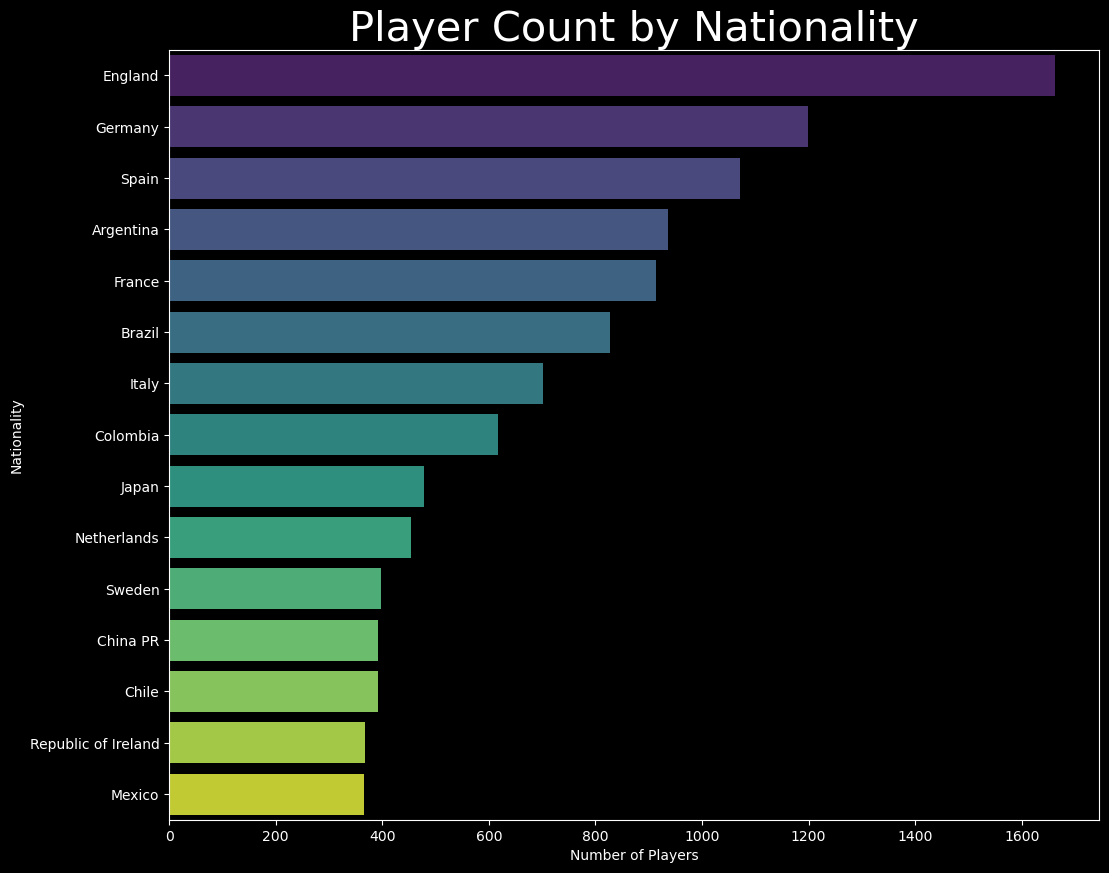

In [64]:
plt.figure(figsize=(12, 10))
sns.countplot(y='Nationality', data=data, order=data['Nationality'].value_counts().head(15).index, palette='viridis')
plt.title('Player Count by Nationality', fontsize=30)
plt.xlabel('Number of Players')
plt.ylabel('Nationality')
plt.show()

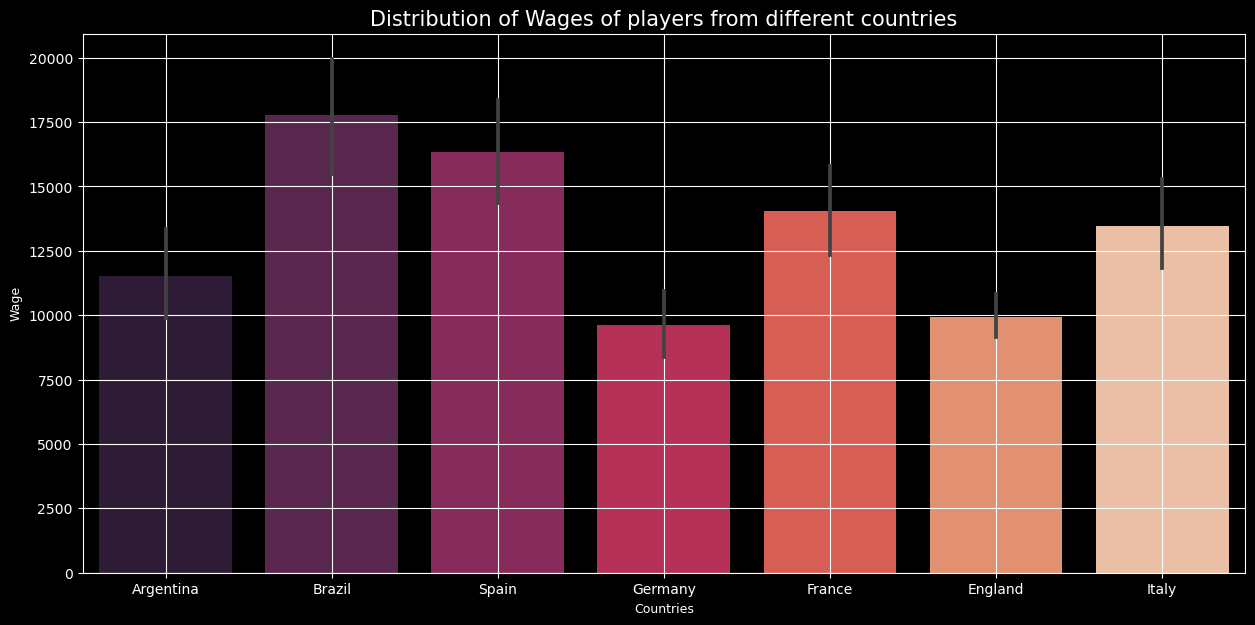

In [41]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['Wage']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'rocket')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Wage', fontsize = 9)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 15)
plt.grid()
plt.show()

c:\Users\Zaghloula\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):

c:\Users\Zaghloula\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):

c:\Users\Zaghloula\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

  with pd.option_context('mode.use_inf_as_na', True):

c:\Users\Zaghloula\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert 

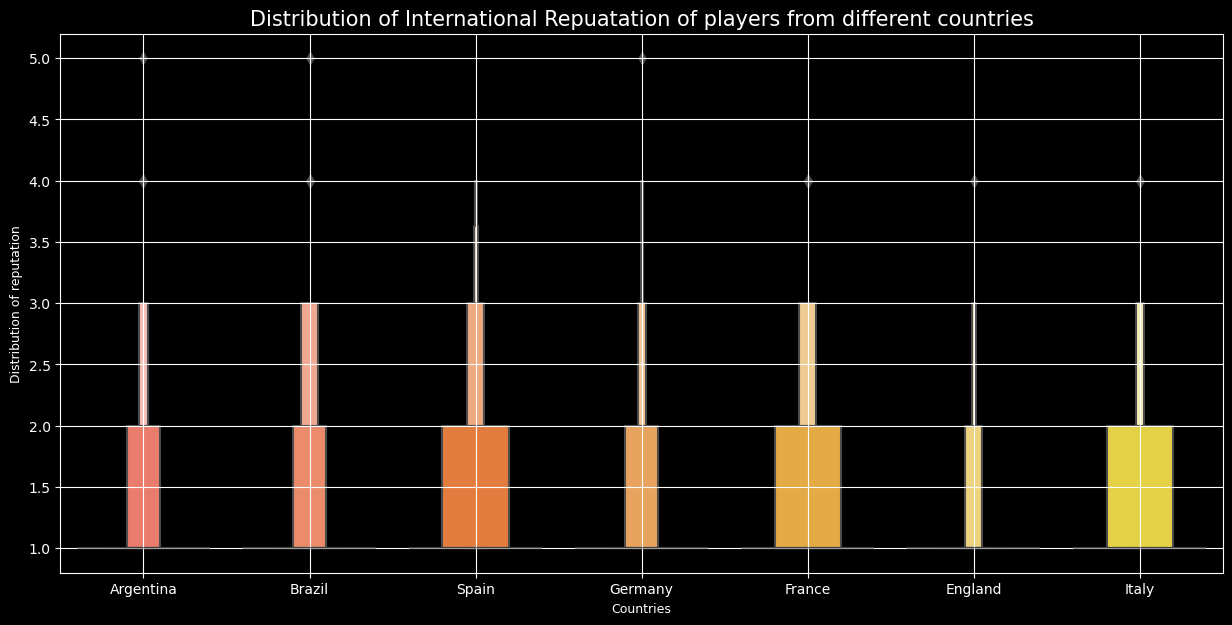

In [44]:
some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = data.loc[data['Nationality'].isin(some_countries) & data['International Reputation']]

plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.boxenplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 9)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.grid()
plt.show()

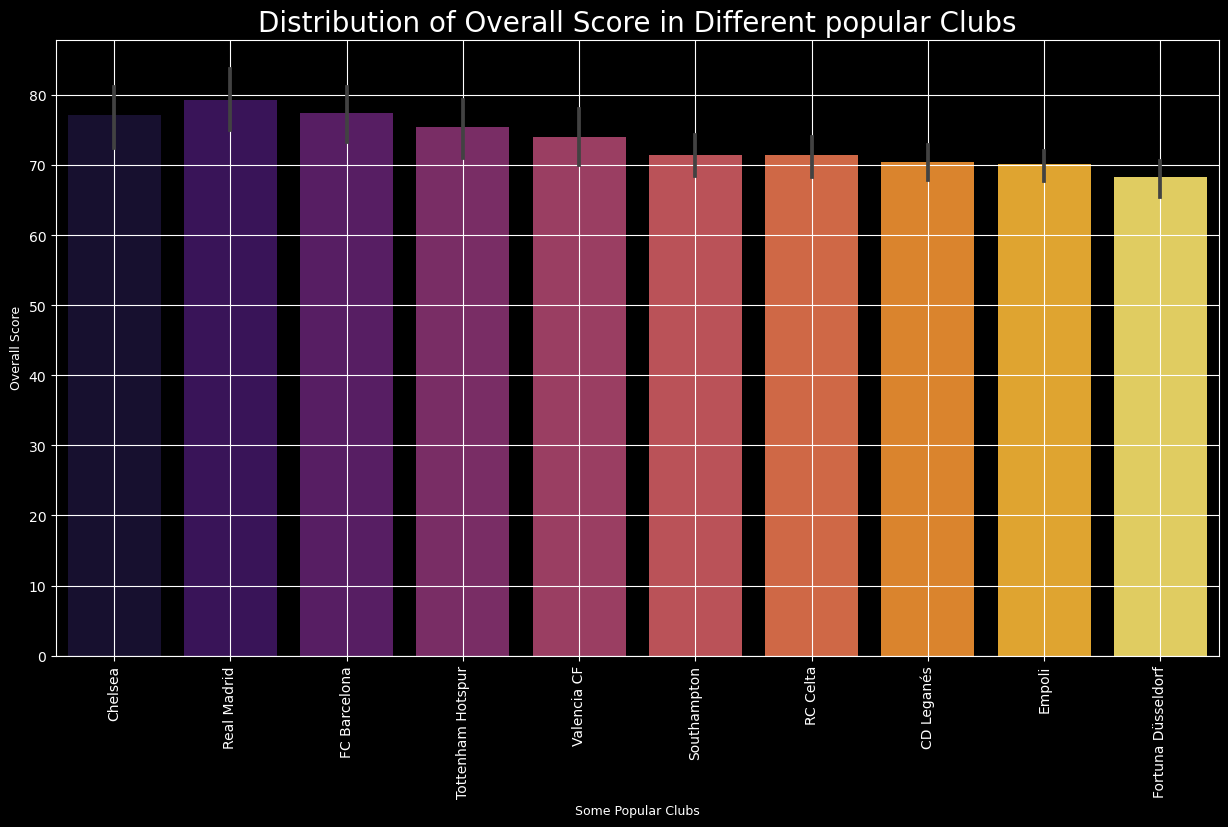

In [65]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']]

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.barplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

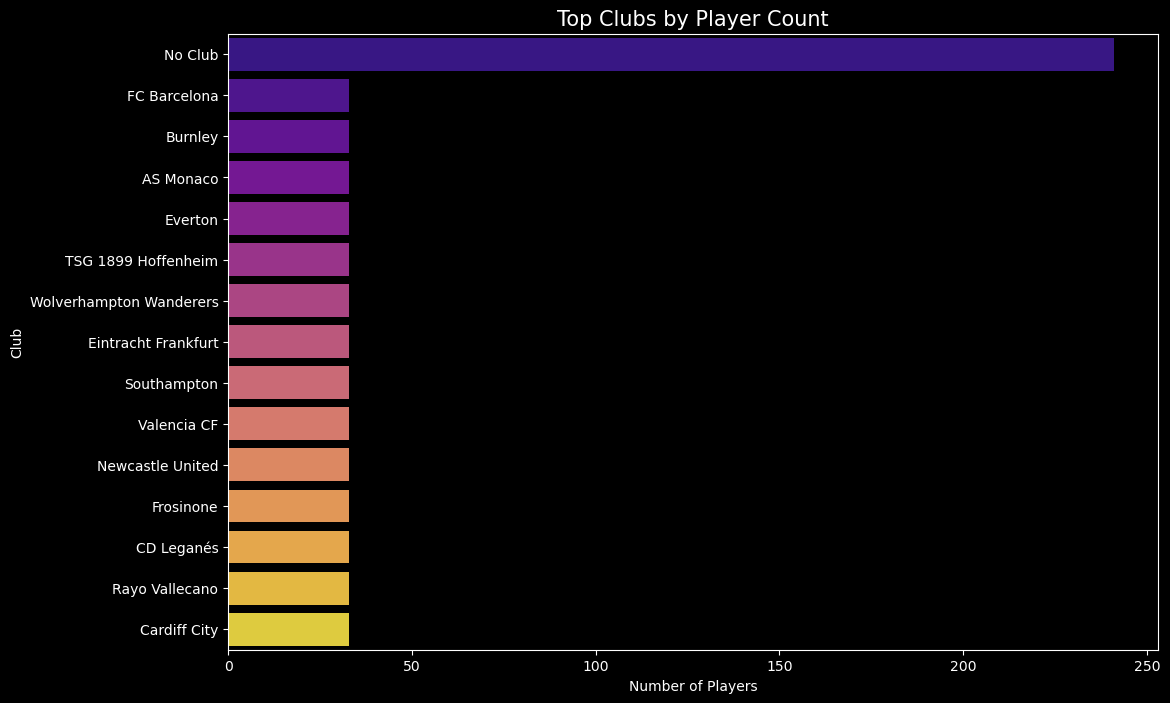

In [66]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Club', data=data, order=data['Club'].value_counts().head(15).index, palette='plasma')
plt.title('Top Clubs by Player Count', fontsize=15)
plt.xlabel('Number of Players')
plt.ylabel('Club')
plt.show()

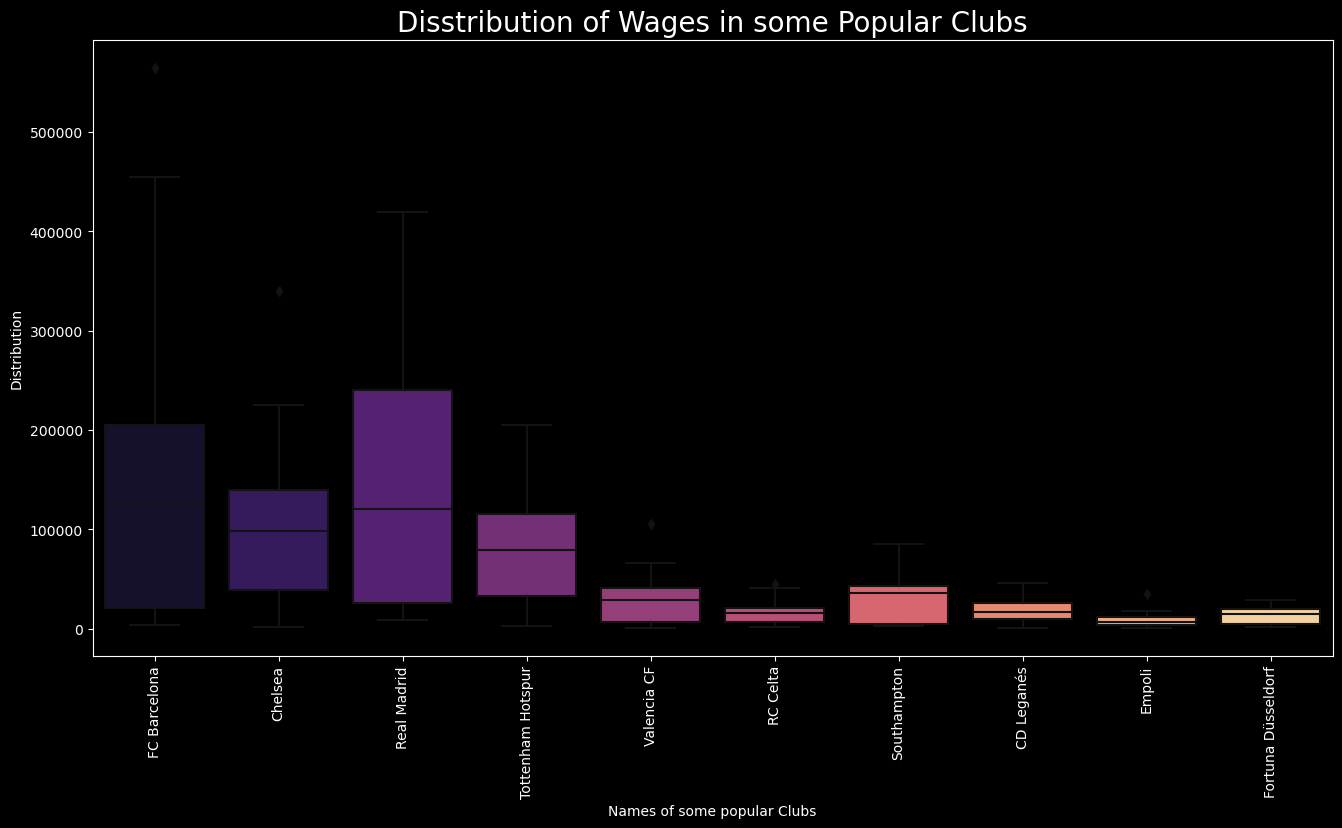

In [47]:

some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['Wage']]

plt.rcParams['figure.figsize'] = (16, 8)
ax = sns.boxplot(x = 'Club', y = 'Wage', data = data_club, palette = 'magma')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 10)
ax.set_ylabel(ylabel = 'Distribution', fontsize = 10)
ax.set_title(label = 'Disstribution of Wages in some Popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()